<a href="https://colab.research.google.com/github/Anchalmohadikar/diabetic_person_prediction/blob/master/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm

import matplotlib.pyplot as plt 

In [ ]:
#collecting the Data...

dataset= pd.read_csv('/content/sample_data/diabetes.csv')

#dataet
print(dataset)


     Pregnancies  Glucose  ...  Age  Outcome
0              6      148  ...   50        1
1              1       85  ...   31        0
2              8      183  ...   32        1
3              1       89  ...   21        0
4              0      137  ...   33        1
..           ...      ...  ...  ...      ...
763           10      101  ...   63        0
764            2      122  ...   27        0
765            5      121  ...   30        0
766            1      126  ...   47        1
767            1       93  ...   23        0

[768 rows x 9 columns]


In [ ]:

print(dataset.shape)

(768, 9)


In [ ]:
# printing the 1st five rows of the dataset

dataset.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# statistical information of the data

dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

0 -> non-diabetic
  
  
  1->diabetic
  


In [ ]:
dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
# separate the data and labels
x= dataset.drop(columns= 'Outcome', axis=1)
y=dataset['Outcome']

In [ ]:
print(x)

     Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
0              6      148             72  ...  33.6                     0.627   50
1              1       85             66  ...  26.6                     0.351   31
2              8      183             64  ...  23.3                     0.672   32
3              1       89             66  ...  28.1                     0.167   21
4              0      137             40  ...  43.1                     2.288   33
..           ...      ...            ...  ...   ...                       ...  ...
763           10      101             76  ...  32.9                     0.171   63
764            2      122             70  ...  36.8                     0.340   27
765            5      121             72  ...  26.2                     0.245   30
766            1      126             60  ...  30.1                     0.349   47
767            1       93             70  ...  30.4                     0.315   23

[76

In [ ]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Data standardization


In [ ]:
scaler = StandardScaler()
scaler.fit(x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
std_data= scaler.transform(x)

In [ ]:
print(std_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [ ]:
x= std_data # represents the data
y= dataset['Outcome'] # y represents the modal

In [ ]:
print(x)
print(y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [ ]:
x_train ,x_test,y_train, y_test= train_test_split(x,y,test_size= 0.2, stratify=y,random_state=2)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(768, 8) (614, 8) (154, 8)


Training the models


In [ ]:
classifier= svm.SVC(kernel='linear') # support vector machine (svm)  , support vector classifier(svc)


In [ ]:
# fit the training data into classifier

classifier.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Evaluate the model, 
evaluation is How many time the model is predicting correctly
[link text](https://)

In [ ]:
#Accuracy on our trainig data
x_train_prediction = classifier.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [ ]:
print('Accuracy of the training data', training_data_accuracy)

Accuracy of the training data 0.7833876221498371


In [ ]:
#Accuracy on our test data
x_test_prediction = classifier.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [ ]:
print('Accuracy of the test data', test_data_accuracy)

Accuracy of the test data 0.7727272727272727


Predictive system to check person is diabetic or not with the help of provided data


In [ ]:
input_data = (4,110,92,0,0,37.6,0.191,30)

# converting input data into numpy array
input_data_as_numpy_array = np.asarray(input_data)

 # reshape the array as we are predicting it for one instant

input_data_reshaped= input_data_as_numpy_array.reshape(1,-1)

 #stadardize the data
std_data= scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if(prediction[0] == 0):

    print('The result of diabetic is - NEGATIVE')

else:
  print('***************************************')
  print('The result of diabetic is - POSITIVE')
  print('***************************************')

  



[[ 0.04601433 -0.34096773  1.18359575 -1.28821221 -0.69289057  0.71168975
  -0.84827977 -0.27575966]]
[0]
The result of diabetic is - NEGATIVE


(array([500.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 268.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

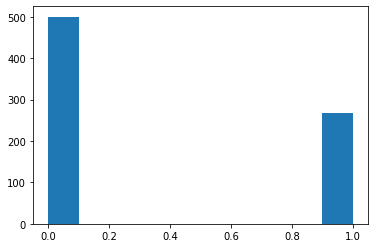

In [ ]:
plt.hist(dataset.Outcome)